# Hearing Test

## Data

An experiment was conducted on 5000 participants to study the effects of age and physical health on hearing loss, specifically the ability to hear high pitched tones. This data displays the result of the study in which participants were evaluated and scored for physical ability and then had to take an audio test (pass/no pass) which evaluated their ability to hear high frequencies. The age of the user was also noted. Is it possible to build a model that would predict someone's liklihood to hear the high frequency sound based solely on their features (age and physical score)?

* Features

    * age - Age of participant in years
    * physical_score - Score achieved during physical exam

* Label/Target

    * test_result - 0 if no pass, 1 if test passed

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, recall_score, precision_score, accuracy_score
from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve

In [2]:
df = pd.read_csv("hearing_test.csv")

In [3]:
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [4]:
df.shape

(5000, 3)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             5000 non-null   float64
 1   physical_score  5000 non-null   float64
 2   test_result     5000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 117.3 KB


In [6]:
df.describe()

,age,physical_score,test_result
count,5000.000000,5000.000000,5000.000000
mean,51.609000,32.760260,0.600000
std,11.287001,8.169802,0.489947
min,18.000000,-0.000000,0.000000
25%,43.000000,26.700000,0.000000
50%,51.000000,35.300000,1.000000
75%,60.000000,38.900000,1.000000
max,90.000000,50.000000,1.000000


### EDA:

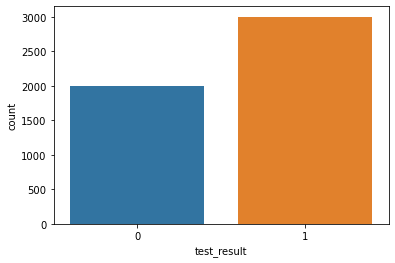

In [7]:
# Count Plot of "Test_Result":

sns.countplot(data= df, x= "test_result")
plt.show()

In [8]:
df["test_result"].value_counts()

1    3000
0    2000
Name: test_result, dtype: int64

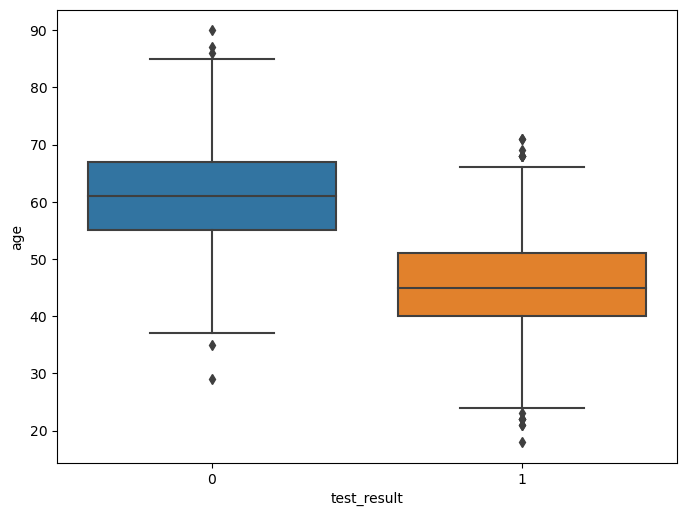

In [12]:
# Relation Between "age" and "test_result":

plt.figure(figsize=(8,6), dpi= 100)
sns.boxplot(data= df, x= "test_result", y= "age")
plt.show()

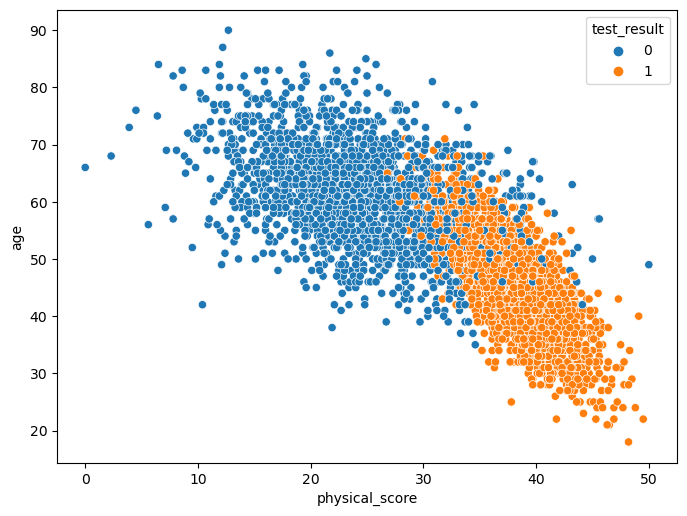

In [15]:
plt.figure(figsize=(8,6), dpi= 100)
sns.scatterplot(data= df, x= "physical_score", y= "age", hue= "test_result")
plt.show()

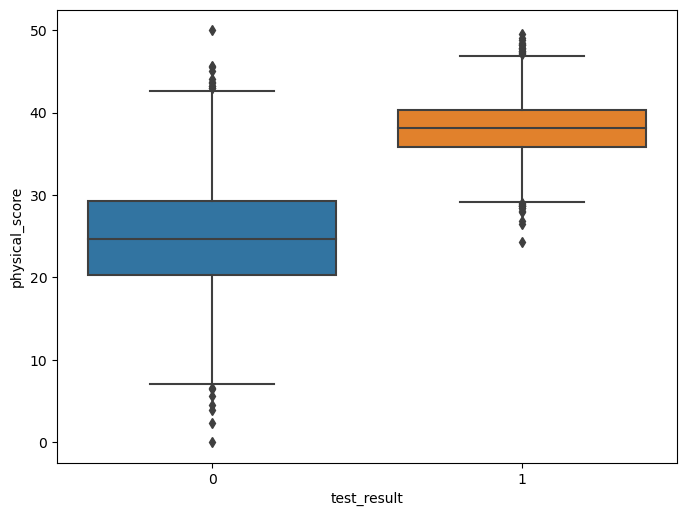

In [13]:
# Relation Between "physical_score" and "test_result":

plt.figure(figsize=(8,6), dpi= 100)
sns.boxplot(data= df, x= "test_result", y= "physical_score")
plt.show()

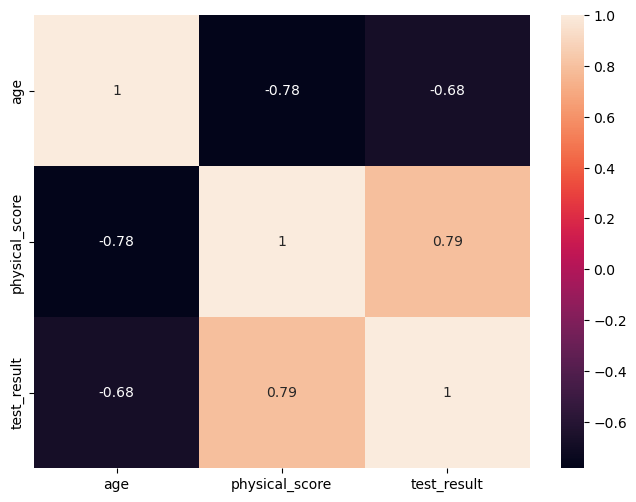

In [16]:
# Correlation:

plt.figure(figsize=(8,6), dpi= 100)
sns.heatmap(df.corr(), annot= True)
plt.show()

In [17]:
# Strong Positive Correlation Between "test_result" and "physical_score"

# Strong Negative Correlation Between "test_result" and "age".

### Train Test Split:

In [18]:
# Features:

x = df.drop("test_result", axis= 1)

In [19]:
x.head()

,age,physical_score
0,33.0,40.7
1,50.0,37.2
2,52.0,24.7
3,56.0,31.0
4,35.0,42.9


In [20]:
# Target:

y = df["test_result"]

In [21]:
y.head()

0    1
1    1
2    0
3    0
4    1
Name: test_result, dtype: int64

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 42)

In [23]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4000, 2)
(1000, 2)
(4000,)
(1000,)


### Scalling:

In [25]:
sc = StandardScaler()

In [26]:
temp = sc.fit_transform(x_train)

In [27]:
x_train = pd.DataFrame(temp, columns= x_train. columns)

In [29]:
temp = sc.transform(x_test)

In [30]:
x_test = pd.DataFrame(temp, columns= x_test. columns)

In [31]:
x_train.head()

,age,physical_score
0,-1.113955,0.925707
1,0.558749,0.009812
2,-0.057510,-0.600784
3,0.118564,0.559349
4,-0.761807,0.718104


In [32]:
x_test.head()

,age,physical_score
0,0.294638,0.852435
1,0.646786,-1.028201
2,-0.849844,0.595985
3,-1.466103,1.047826
4,0.118564,-0.783963


### Model:

In [33]:
log_model = LogisticRegression()

In [34]:
log_model.fit(x_train, y_train)

LogisticRegression()

In [35]:
pred = log_model.predict(x_test)

In [36]:
# We can also see Probabilities of Each Observation belonging to different Classes:

log_model.predict_proba(x_test)

array([[0.03533778, 0.96466222],
       [0.98048073, 0.01951927],
       [0.03181439, 0.96818561],
       ...,
       [0.13630388, 0.86369612],
       [0.15068753, 0.84931247],
       [0.10168713, 0.89831287]])

### Different Metrics for Performance Evaluation of Classification Model:

In [38]:
# Accuracy:

accuracy_score(y_test, pred)

0.897

In [39]:
# Precision:

precision_score(y_test, pred)

0.9077901430842608

In [40]:
# Recall:

recall_score(y_test, pred)

0.926948051948052

In [41]:
# Confusion Matrix:

confusion_matrix(y_test, pred)

array([[326,  58],
       [ 45, 571]], dtype=int64)

In [42]:
# Classification Report:

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.88      0.85      0.86       384
           1       0.91      0.93      0.92       616

    accuracy                           0.90      1000
   macro avg       0.89      0.89      0.89      1000
weighted avg       0.90      0.90      0.90      1000



### Plots for Performance Evaluation of Classification Model:

In [44]:
# For all these Plots, we need to pass Model and Testing Data into Parameters.

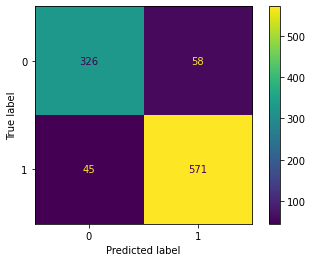

In [46]:
# Confusion Matrix:

plot_confusion_matrix(log_model, x_test, y_test)
plt.show()

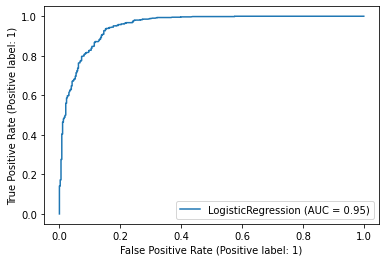

In [48]:
# ROC Curve:

plot_roc_curve(log_model, x_test, y_test)
plt.show()

sensitivity, recall, hit rate, or true positive rate (TPR):

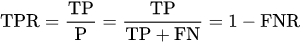

fall-out or false positive rate (FPR):
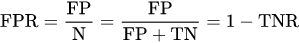

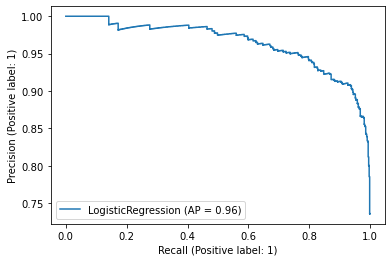

In [49]:
# Precision-Recall Curve:

plot_precision_recall_curve(log_model, x_test, y_test)
plt.show()